Linear Regression Mean Squared Error: 0.052459306167035986
Linear Regression Accuracy: 0.967741935483871
Linear Regression Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62



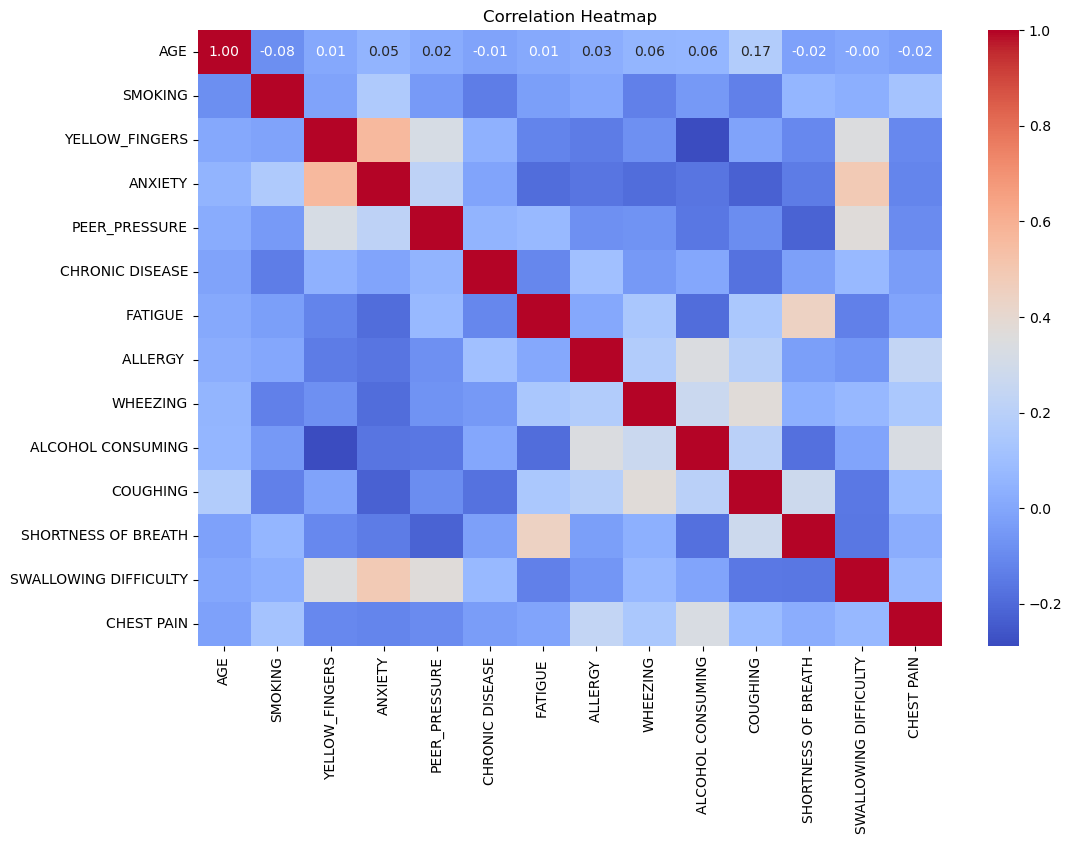

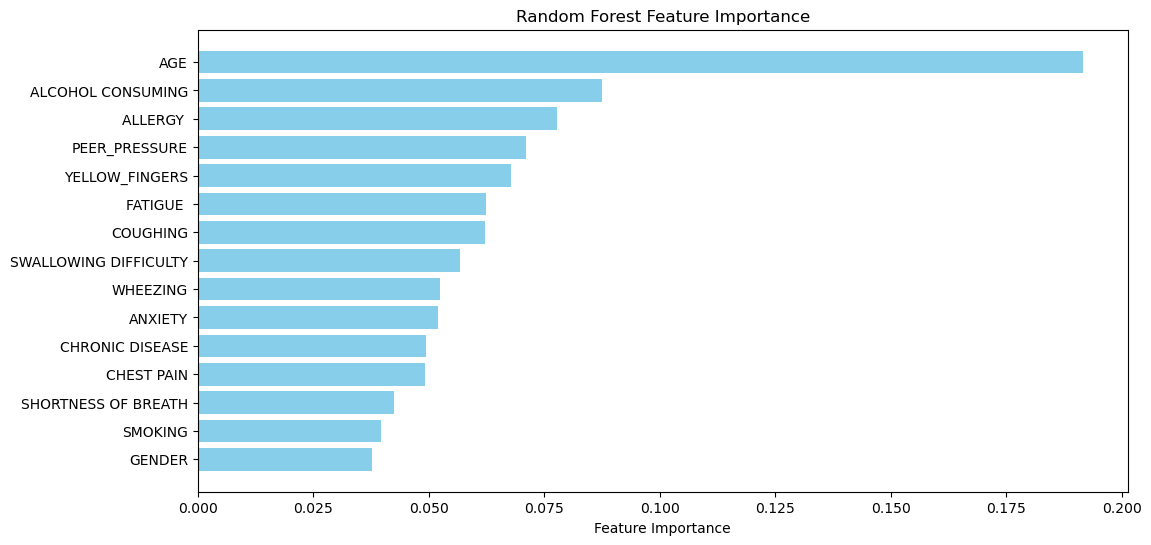

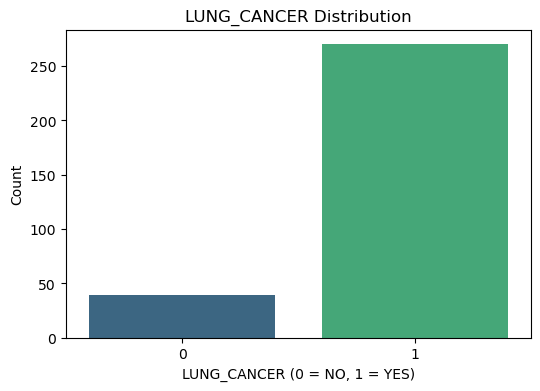

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
#importing lib
#importing data
#
file1 = pd.read_csv(r"C:\Users\reekr\Downloads\file1.csv")
categorical_columns = ['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 
                       'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL CONSUMING', 
                       'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']
label_encoders = {}
for column in categorical_columns:
    if column in file1.columns:
        label_encoders[column] = LabelEncoder()
        file1[column] = label_encoders[column].fit_transform(file1[column])

X = file1.drop('LUNG_CANCER', axis=1)
y = file1['LUNG_CANCER'].apply(lambda x: 1 if x == 'YES' else 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train) #training .fit()
y_pred_linear = linear_model.predict(X_test_scaled)
linear_mse = mean_squared_error(y_test, y_pred_linear)
print("Linear Regression Mean Squared Error:", linear_mse)

random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_scaled, y_train)
y_pred_rf = random_forest_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Linear Regression Accuracy:", rf_accuracy)
print("Linear Regression Classification Report:\n", classification_report(y_test, y_pred_rf))

numeric_columns = file1.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = file1[numeric_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

feature_importances = random_forest_model.feature_importances_
sorted_idx = feature_importances.argsort()

plt.figure(figsize=(12, 6))
plt.barh(X.columns[sorted_idx], feature_importances[sorted_idx], color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette="viridis")
plt.title("LUNG_CANCER Distribution")
plt.xlabel("LUNG_CANCER (0 = NO, 1 = YES)")
plt.ylabel("Count")
plt.show()


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

file_path = r'C:\Users\reekr\Downloads\file1.csv' 
data = pd.read_csv(file_path)
print("Missing values before handling:")
print(data.isnull().sum())

data.fillna(data.median(numeric_only=True), inplace=True)
for col in data.select_dtypes(include='object').columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

print("Missing values after handling:")
print(data.isnull().sum())

data = pd.get_dummies(data, drop_first=True)
X = data.drop(columns=['LUNG_CANCER']) 
y = data['LUNG_CANCER']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

y_pred = rf_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Missing values before handling:
GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64
Missing values after handling:
GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


KeyError: "['LUNG_CANCER'] not found in axis"

In [3]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest Model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_scaled, y_train)


NameError: name 'X_train_scaled' is not defined

In [4]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure predictions are made
y_pred_rf = random_forest_model.predict(X_test_scaled)

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['No Cancer', 'Yes Cancer'], 
            yticklabels=['No Cancer', 'Yes Cancer'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


NameError: name 'X_test_scaled' is not defined

Confusion Matrix:
[[ 1  4]
 [ 0 26]]


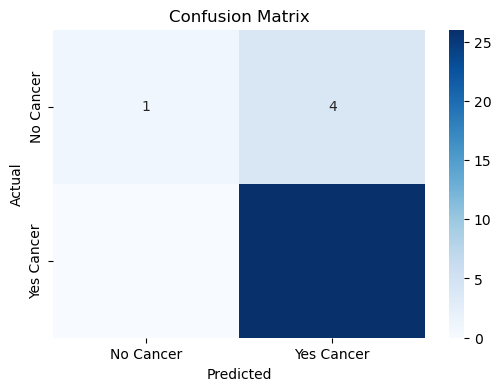

In [7]:
import pandas as pd
import io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

csv_data = """
GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE ,ALLERGY ,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES

F,81,1,1,1,2,2,1,2,1,2,2,2,1,1,YES
M,56,1,1,1,1,2,2,2,1,2,2,2,1,2,YES
M,60,1,2,2,1,1,1,1,2,2,2,2,2,1,YES
M,66,1,2,2,1,2,1,2,1,2,2,2,1,2,YES
M,62,1,2,2,1,1,2,1,2,1,1,1,2,2,YES
F,62,2,2,2,1,2,1,2,1,2,1,1,1,1,YES
F,55,2,1,1,2,2,2,2,2,2,1,1,2,2,YES
F,62,1,1,1,2,1,1,1,2,2,1,1,2,2,YES
F,71,1,1,1,1,2,2,2,1,1,2,2,1,2,YES
M,52,2,1,1,1,2,2,2,2,2,1,1,2,2,YES
F,59,1,2,2,2,2,1,2,2,2,2,2,2,1,YES
M,48,2,1,1,1,2,2,2,1,2,2,2,2,2,YES
M,60,1,2,2,2,1,2,1,1,1,1,1,2,2,YES
F,61,2,2,2,1,1,1,2,1,2,2,2,1,2,YES
M,59,2,1,1,2,1,1,1,1,2,2,2,1,1,YES
M,64,1,2,2,2,1,2,2,1,1,2,1,2,1,YES
M,56,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
M,58,2,1,1,1,1,1,2,2,2,2,1,1,1,YES
F,81,1,2,2,2,2,2,2,2,1,2,2,2,2,YES
M,64,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
M,62,2,2,2,2,2,1,1,1,2,1,1,2,2,YES
F,72,2,2,2,2,1,2,1,1,1,2,2,2,2,YES
F,60,1,1,1,1,2,2,1,1,1,1,2,1,1,YES
F,61,2,2,2,2,2,2,1,1,1,1,2,2,1,YES
F,60,2,2,2,2,2,1,2,2,2,1,1,2,2,YES
F,49,1,1,1,2,2,1,2,1,2,2,2,1,1,YES
M,53,1,1,1,1,2,2,2,1,2,1,2,1,2,YES
M,58,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
M,61,2,2,2,1,1,2,2,1,2,1,2,2,2,YES
F,68,1,1,1,2,1,2,1,2,1,2,2,1,2,YES
M,60,2,2,2,1,1,1,1,1,2,1,1,2,2,YES
M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES
F,74,1,2,2,2,2,2,1,2,2,1,1,1,1,YES
M,69,2,1,1,2,1,1,1,1,1,1,1,1,2,NO
F,64,2,2,1,2,2,1,1,1,1,1,1,1,1,NO
M,75,2,2,2,2,2,1,1,1,1,1,1,1,2,YES
M,47,2,2,1,1,2,1,1,1,1,1,1,1,2,NO
F,57,2,2,1,2,1,1,1,1,1,1,1,1,2,NO
F,56,1,1,2,2,2,2,2,2,2,1,2,2,2,YES
M,68,1,1,2,2,2,1,1,1,2,1,1,1,1,NO
F,55,1,1,1,2,2,2,2,2,2,1,1,1,2,YES
M,62,2,2,2,1,2,2,2,2,1,1,2,1,1,YES
F,73,2,1,1,2,1,2,2,2,2,2,1,2,2,YES
M,68,2,1,1,2,2,2,2,2,2,2,2,2,2,YES
F,75,1,2,1,2,2,2,2,1,2,2,1,1,1,YES
M,63,1,2,2,1,2,1,2,2,2,2,1,2,1,YES
F,61,1,2,1,2,1,2,1,1,1,2,2,1,2,YES
M,62,1,1,1,1,2,1,2,1,2,2,2,2,2,YES
M,44,1,2,1,2,2,2,1,2,1,1,2,2,2,YES
M,56,2,2,2,2,1,2,2,1,2,2,2,1,2,YES
M,54,1,2,1,2,2,2,2,2,2,2,1,2,2,YES
F,57,1,2,2,1,1,1,1,1,1,2,1,1,1,NO
M,56,1,2,1,2,1,2,2,2,2,2,1,1,1,YES
F,69,1,1,2,1,2,1,2,2,2,1,1,2,1,YES
M,72,1,2,1,2,1,2,2,2,2,2,2,1,2,YES
F,59,2,2,2,2,2,2,1,2,1,2,1,2,2,YES
F,70,1,2,1,1,2,2,2,2,1,2,2,1,2,YES
M,64,2,1,1,1,1,2,1,2,2,2,2,1,1,YES
F,61,2,2,2,2,1,2,2,1,1,1,2,2,2,YES
F,72,2,2,2,2,1,2,1,2,1,2,2,2,1,YES
M,63,2,2,2,2,1,1,2,1,2,1,1,2,2,YES
F,74,2,2,2,2,1,2,1,2,1,2,2,2,1,YES
M,71,1,1,1,1,2,2,2,2,2,2,2,1,2,YES
F,71,2,1,1,1,2,2,1,1,1,1,2,1,1,NO
M,72,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
M,77,2,1,1,1,1,1,2,2,2,2,1,1,1,YES
F,72,1,2,2,2,2,2,1,1,1,1,1,1,1,YES
M,55,2,1,1,1,1,2,1,1,1,1,1,1,1,YES
M,65,2,2,2,2,2,1,1,1,1,1,1,1,1,YES
F,67,2,2,2,2,1,2,1,1,1,1,1,1,1,YES
F,69,1,1,1,1,2,2,1,1,1,1,1,1,1,YES
F,55,2,2,2,2,2,2,1,1,1,1,1,1,1,YES
F,51,2,2,2,2,2,1,1,1,1,1,1,1,1,YES
F,64,1,1,1,2,2,1,1,1,1,1,1,1,1,YES
M,63,1,1,1,1,2,2,2,1,2,2,2,1,2,YES
M,69,1,2,2,1,1,1,1,2,2,2,2,2,1,YES
M,64,1,2,2,1,2,1,2,1,2,2,2,1,2,YES
M,59,1,2,2,1,1,2,1,2,1,1,1,2,2,YES
M,64,2,2,2,2,1,2,2,1,2,2,2,1,2,YES
M,62,1,2,1,2,2,2,2,2,2,2,1,2,2,YES
F,49,1,2,2,1,1,1,1,1,1,2,1,1,1,YES
M,77,1,2,1,2,1,2,2,2,2,2,1,1,1,YES
F,64,1,1,2,1,2,1,2,2,2,1,1,2,1,YES
M,63,1,2,1,2,1,2,2,2,2,2,2,1,2,YES
F,54,2,2,2,2,2,2,1,2,1,2,1,2,2,YES
F,38,1,2,1,1,2,2,2,2,1,2,2,1,2,YES
F,75,1,2,2,2,1,1,2,2,1,2,1,2,1,YES
F,70,2,1,1,2,2,1,2,1,1,1,2,1,1,YES
M,59,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
M,77,2,2,2,1,2,1,2,2,1,1,1,2,2,YES
M,61,1,1,2,1,2,2,1,2,2,2,2,2,1,YES
F,64,2,2,2,1,1,2,2,1,1,1,2,1,2,YES
M,59,1,1,1,2,1,2,1,2,1,1,2,1,2,NO
F,71,2,2,2,1,2,1,1,2,2,1,2,2,2,YES
M,67,1,2,1,1,1,2,1,2,2,2,2,1,1,YES
F,64,2,2,1,2,2,2,2,2,1,2,2,1,1,YES
M,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
M,69,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
F,64,2,2,2,2,2,2,2,2,1,2,2,2,2,YES
M,59,1,2,2,2,2,1,2,1,2,1,1,2,2,YES
F,67,2,2,2,2,1,2,1,2,1,2,2,2,1,YES
M,74,1,2,1,1,2,2,2,2,2,2,2,1,2,YES
F,77,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
M,60,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
M,64,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
M,70,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
M,58,1,1,1,2,1,2,2,2,2,1,1,2,1,YES
F,59,1,2,2,2,2,2,1,2,2,1,1,1,1,YES
M,39,2,1,1,2,1,2,2,2,2,1,2,1,2,YES
F,67,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
F,71,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
M,70,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
F,60,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
F,55,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
M,60,2,2,2,2,2,1,2,1,2,1,1,2,2,YES
F,55,2,2,2,2,2,2,1,2,1,2,2,2,1,YES
M,55,1,1,1,1,2,2,2,2,2,2,2,1,2,YES
F,70,2,1,1,1,1,2,1,1,1,1,2,1,1,NO
M,63,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
M,64,2,1,1,1,1,1,2,2,2,2,1,1,2,NO
F,59,1,2,2,2,2,2,2,2,1,2,2,2,1,YES
M,56,2,1,1,1,2,1,2,2,2,2,2,1,2,YES
M,64,2,2,2,2,2,1,1,1,2,1,1,2,2,YES
F,62,2,2,2,2,2,2,1,1,1,2,2,1,1,YES
F,87,1,1,1,1,2,2,1,1,1,1,2,1,1,NO
F,77,2,2,2,2,2,2,1,1,1,1,2,2,1,YES
F,59,1,2,2,2,1,1,2,2,1,2,1,2,1,YES
F,59,2,1,1,1,2,2,2,1,1,1,2,1,1,NO
M,55,2,1,1,1,1,2,2,1,1,1,2,1,2,NO
M,46,1,2,2,1,1,1,1,1,1,1,1,2,2,NO
M,60,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
M,58,2,2,2,2,2,1,1,1,2,1,1,2,2,YES
F,58,2,2,2,2,1,2,1,1,1,2,2,2,1,YES
F,63,1,1,1,1,2,2,1,1,1,1,2,1,1,NO
F,51,2,2,2,2,1,2,1,1,1,1,2,2,1,YES
F,61,1,2,2,2,1,1,2,2,1,2,1,2,1,YES
F,61,2,1,1,1,2,2,2,1,1,1,2,1,1,YES
M,76,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
M,71,2,2,2,1,2,1,2,2,2,2,1,2,2,YES
M,69,1,1,2,1,1,2,1,2,2,2,2,2,1,YES
F,56,2,2,2,1,1,2,2,1,1,1,2,1,2,YES
M,67,1,1,1,2,1,2,1,2,1,2,2,1,2,YES
F,54,2,2,2,1,2,1,1,2,2,1,2,2,2,YES
M,63,1,2,1,1,1,2,1,2,2,2,2,1,1,YES
F,47,2,2,1,2,2,2,2,2,1,2,2,1,1,YES
M,62,2,1,2,1,1,2,1,2,2,2,2,1,2,YES
M,65,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
"""

df = pd.read_csv(io.StringIO(csv_data.strip()))
categorical_columns = [
    'GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
    'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING',
    'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN'
]
label_encoders = {}
for col in categorical_columns:
    if col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str).str.strip())
        label_encoders[col] = le

X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER'].apply(lambda x: 1 if x.strip() == 'YES' else 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred = rf_model.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Cancer', 'Yes Cancer'],
            yticklabels=['No Cancer', 'Yes Cancer'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Confusion Matrix for Linear Regression:
[[ 0  5]
 [ 0 26]]


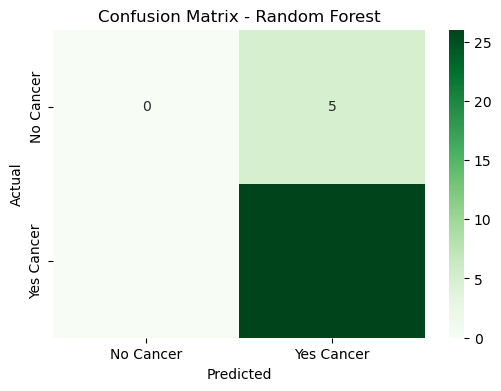

In [2]:
import pandas as pd
import io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Paste your CSV data into a multi-line string.
csv_data = """
GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE ,ALLERGY ,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES

F,81,1,1,1,2,2,1,2,1,2,2,2,1,1,YES
M,56,1,1,1,1,2,2,2,1,2,2,2,1,2,YES
M,60,1,2,2,1,1,1,1,2,2,2,2,2,1,YES
M,66,1,2,2,1,2,1,2,1,2,2,2,1,2,YES
M,62,1,2,2,1,1,2,1,2,1,1,1,2,2,YES
F,62,2,2,2,1,2,1,2,1,2,1,1,1,1,YES
F,55,2,1,1,2,2,2,2,2,2,1,1,2,2,YES
F,62,1,1,1,2,1,1,1,2,2,1,1,2,2,YES
F,71,1,1,1,1,2,2,2,1,1,2,2,1,2,YES
M,52,2,1,1,1,2,2,2,2,2,1,1,2,2,YES
F,59,1,2,2,2,2,1,2,2,2,2,2,2,1,YES
M,48,2,1,1,1,2,2,2,1,2,2,2,2,2,YES
M,60,1,2,2,2,1,2,1,1,1,1,1,2,2,YES
F,61,2,2,2,1,1,1,2,1,2,2,2,1,2,YES
M,59,2,1,1,2,1,1,1,1,2,2,2,1,1,YES
M,64,1,2,2,2,1,2,2,1,1,2,1,2,1,YES
M,56,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
M,58,2,1,1,1,1,1,2,2,2,2,1,1,1,YES
F,81,1,2,2,2,2,2,2,2,1,2,2,2,2,YES
M,64,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
M,62,2,2,2,2,2,1,1,1,2,1,1,2,2,YES
F,72,2,2,2,2,1,2,1,1,1,2,2,2,2,YES
F,60,1,1,1,1,2,2,1,1,1,1,2,1,1,YES
F,61,2,2,2,2,2,2,1,1,1,1,2,2,1,YES
F,60,2,2,2,2,2,1,2,2,2,1,1,2,2,YES
F,49,1,1,1,2,2,1,2,1,2,2,2,1,1,YES
M,53,1,1,1,1,2,2,2,1,2,1,2,1,2,YES
M,58,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
M,61,2,2,2,1,1,2,2,1,2,1,2,2,2,YES
F,68,1,1,1,2,1,2,1,2,1,2,2,1,2,YES
M,60,2,2,2,1,1,1,1,1,2,1,1,2,2,YES
M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES
F,74,1,2,2,2,2,2,1,2,2,1,1,1,1,YES
M,69,2,1,1,2,1,1,1,1,1,1,1,1,2,NO
F,64,2,2,1,2,2,1,1,1,1,1,1,1,1,NO
M,75,2,2,2,2,2,1,1,1,1,1,1,1,2,YES
M,47,2,2,1,1,2,1,1,1,1,1,1,1,2,NO
F,57,2,2,1,2,1,1,1,1,1,1,1,1,2,NO
F,56,1,1,2,2,2,2,2,2,2,1,2,2,2,YES
M,68,1,1,2,2,2,1,1,1,2,1,1,1,1,NO
F,55,1,1,1,2,2,2,2,2,2,1,1,1,2,YES
M,62,2,2,2,1,2,2,2,2,1,1,2,1,1,YES
F,73,2,1,1,2,1,2,2,2,2,2,1,2,2,YES
M,68,2,1,1,2,2,2,2,2,2,2,2,2,2,YES
F,75,1,2,1,2,2,2,2,1,2,2,1,1,1,YES
M,63,1,2,2,1,2,1,2,2,2,2,1,2,1,YES
F,61,1,2,1,2,1,2,1,1,1,2,2,1,2,YES
M,62,1,1,1,1,2,1,2,1,2,2,2,2,2,YES
M,44,1,2,1,2,2,2,1,2,1,1,2,2,2,YES
M,56,2,2,2,2,1,2,2,1,2,2,2,1,2,YES
M,54,1,2,1,2,2,2,2,2,2,2,1,2,2,YES
F,57,1,2,2,1,1,1,1,1,1,2,1,1,1,NO
M,56,1,2,1,2,1,2,2,2,2,2,1,1,1,YES
F,69,1,1,2,1,2,1,2,2,2,1,1,2,1,YES
M,72,1,2,1,2,1,2,2,2,2,2,2,1,2,YES
F,59,2,2,2,2,2,2,1,2,1,2,1,2,2,YES
F,70,1,2,1,1,2,2,2,2,1,2,2,1,2,YES
M,64,2,1,1,1,1,2,1,2,2,2,2,1,1,YES
F,61,2,2,2,2,1,2,2,1,1,1,2,2,2,YES
F,72,2,2,2,2,1,2,1,2,1,2,2,2,1,YES
M,63,2,2,2,2,1,1,2,1,2,1,1,2,2,YES
F,74,2,2,2,2,1,2,1,2,1,2,2,2,1,YES
M,71,1,1,1,1,2,2,2,2,2,2,2,1,2,YES
F,71,2,1,1,1,2,2,1,1,1,1,2,1,1,NO
M,72,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
M,77,2,1,1,1,1,1,2,2,2,2,1,1,1,YES
F,72,1,2,2,2,2,2,1,1,1,1,1,1,1,YES
M,55,2,1,1,1,1,2,1,1,1,1,1,1,1,YES
M,65,2,2,2,2,2,1,1,1,1,1,1,1,1,YES
F,67,2,2,2,2,1,2,1,1,1,1,1,1,1,YES
F,69,1,1,1,1,2,2,1,1,1,1,1,1,1,YES
F,55,2,2,2,2,2,2,1,1,1,1,1,1,1,YES
F,51,2,2,2,2,2,1,1,1,1,1,1,1,1,YES
F,64,1,1,1,2,2,1,1,1,1,1,1,1,1,YES
M,63,1,1,1,1,2,2,2,1,2,2,2,1,2,YES
M,69,1,2,2,1,1,1,1,2,2,2,2,2,1,YES
M,64,1,2,2,1,2,1,2,1,2,2,2,1,2,YES
M,59,1,2,2,1,1,2,1,2,1,1,1,2,2,YES
M,64,2,2,2,2,1,2,2,1,2,2,2,1,2,YES
M,62,1,2,1,2,2,2,2,2,2,2,1,2,2,YES
F,49,1,2,2,1,1,1,1,1,1,2,1,1,1,YES
M,77,1,2,1,2,1,2,2,2,2,2,1,1,1,YES
F,64,1,1,2,1,2,1,2,2,2,1,1,2,1,YES
M,63,1,2,1,2,1,2,2,2,2,2,2,1,2,YES
F,54,2,2,2,2,2,2,1,2,1,2,1,2,2,YES
F,38,1,2,1,1,2,2,2,2,1,2,2,1,2,YES
F,75,1,2,2,2,1,1,2,2,1,2,1,2,1,YES
F,70,2,1,1,2,2,1,2,1,1,1,2,1,1,YES
M,59,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
M,77,2,2,2,1,2,1,2,2,1,1,1,2,2,YES
M,61,1,1,2,1,2,2,1,2,2,2,2,2,1,YES
F,64,2,2,2,1,1,2,2,1,1,1,2,1,2,YES
M,59,1,1,1,2,1,2,1,2,1,1,2,1,2,NO
F,71,2,2,2,1,2,1,1,2,2,1,2,2,2,YES
M,67,1,2,1,1,1,2,1,2,2,2,2,1,1,YES
F,64,2,2,1,2,2,2,2,2,1,2,2,1,1,YES
M,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
M,69,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
F,64,2,2,2,2,2,2,2,2,1,2,2,2,2,YES
M,59,1,2,2,2,2,1,2,1,2,1,1,2,2,YES
F,67,2,2,2,2,1,2,1,2,1,2,2,2,1,YES
M,74,1,2,1,1,2,2,2,2,2,2,2,1,2,YES
F,77,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
M,60,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
M,64,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
M,70,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
M,58,1,1,1,2,1,2,2,2,2,1,1,2,1,YES
F,59,1,2,2,2,2,2,1,2,2,1,1,1,1,YES
M,39,2,1,1,2,1,2,2,2,2,1,2,1,2,YES
F,67,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
F,71,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
M,70,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
F,60,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
F,55,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
M,60,2,2,2,2,2,1,2,1,2,1,1,2,2,YES
F,55,2,2,2,2,2,2,1,2,1,2,2,2,1,YES
M,55,1,1,1,1,2,2,2,2,2,2,2,1,2,YES
F,70,2,1,1,1,1,2,1,1,1,1,2,1,1,NO
M,63,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
M,64,2,1,1,1,1,1,2,2,2,2,1,1,2,NO
F,59,1,2,2,2,2,2,2,2,1,2,2,2,1,YES
M,56,2,1,1,1,2,1,2,2,2,2,2,1,2,YES
M,64,2,2,2,2,2,1,1,1,2,1,1,2,2,YES
F,62,2,2,2,2,2,2,1,1,1,2,2,1,1,YES
F,87,1,1,1,1,2,2,1,1,1,1,2,1,1,NO
F,77,2,2,2,2,2,2,1,1,1,1,2,2,1,YES
F,59,1,2,2,2,1,1,2,2,1,2,1,2,1,YES
F,59,2,1,1,1,2,2,2,1,1,1,2,1,1,NO
M,55,2,1,1,1,1,2,2,1,1,1,2,1,2,NO
M,46,1,2,2,1,1,1,1,1,1,1,1,2,2,NO
M,60,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
M,58,2,2,2,2,2,1,1,1,2,1,1,2,2,YES
F,58,2,2,2,2,1,2,1,1,1,2,2,2,1,YES
F,63,1,1,1,1,2,2,1,1,1,1,2,1,1,NO
F,51,2,2,2,2,1,2,1,1,1,1,2,2,1,YES
F,61,1,2,2,2,1,1,2,2,1,2,1,2,1,YES
F,61,2,1,1,1,2,2,2,1,1,1,2,1,1,YES
M,76,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
M,71,2,2,2,1,2,1,2,2,2,2,1,2,2,YES
M,69,1,1,2,1,1,2,1,2,2,2,2,2,1,YES
F,56,2,2,2,1,1,2,2,1,1,1,2,1,2,YES
M,67,1,1,1,2,1,2,1,2,1,2,2,1,2,YES
F,54,2,2,2,1,2,1,1,2,2,1,2,2,2,YES
M,63,1,2,1,1,1,2,1,2,2,2,2,1,1,YES
F,47,2,2,1,2,2,2,2,2,1,2,2,1,1,YES
M,62,2,1,2,1,1,2,1,2,2,2,2,1,2,YES
M,65,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
"""

# Read CSV data from the string
df = pd.read_csv(io.StringIO(csv_data.strip()))

# List of categorical columns (as in your original code)
categorical_columns = [
    'GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
    'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING',
    'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN'
]

# Convert categorical columns using LabelEncoder
label_encoders = {}
for col in categorical_columns:
    if col in df.columns:
        le = LabelEncoder()
        # Convert to string and strip spaces before encoding
        df[col] = le.fit_transform(df[col].astype(str).str.strip())
        label_encoders[col] = le

# Prepare features and target
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER'].apply(lambda x: 1 if x.strip() == 'YES' else 0)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# Since Linear Regression outputs continuous values, threshold them at 0.5 to get binary predictions
y_pred_lr_class = (y_pred_lr >= 0.5).astype(int)

# Compute the confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr_class)
print("Confusion Matrix for Linear Regression:")
print(cm_lr)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Cancer', 'Yes Cancer'],
            yticklabels=['No Cancer', 'Yes Cancer'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [8]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Reset the generator (ensures predictions start from the beginning)
validation_generator.reset()

# Compute the number of steps (round up in case the samples are not a multiple of batch_size)
val_steps = np.ceil(validation_generator.samples / validation_generator.batch_size)

# Get model predictions on the validation set
predictions = model.predict(validation_generator, steps=val_steps, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels from the generator
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for CNN Model on Validation Data")
plt.show()


NameError: name 'validation_generator' is not defined